<div>
    <h1>
        Analyzing Sales Data for a Retail Business
    </h1>
    <p>    
The problem in this project is to analyze retail sales data to find patterns and trends that help make business decisions. By looking at customer demographics, product categories, payment methods, and sales in different malls, the goal is to understand what affects purchasing behavior. This analysis can help the business improve inventory, marketing, and customer targeting by identifying popular products, busy sales periods, and preferred payment methods.
    </p>
    <ul>
        <li>
            Mamimize the insights
        </li>
        <li>
            Minimize the customer strain 
        </li>
    </ul>
</div>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [4]:
import os 
os.chdir(r"E:\Artificial intelligence\2.EDA\2.Own Task\1.Beginner")

In [5]:
dataset = pd.read_csv("customer_shopping_data.csv")

In [ ]:
# Basic view 

In [6]:
dataset.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [7]:
dataset.shape

(99457, 10)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [10]:
# Auto EDA for check the dataset better understand 

from dataprep.eda import create_report

In [11]:
report = create_report(dataset, title = "Sales Report")

  0%|                                                                                         | 0/1152 [00:00<…

C:\Users\User\anaconda3\envs\AIenv\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
C:\Users\User\anaconda3\envs\AIenv\lib\site-packages\dataprep\eda\distribution\render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
C:\Users\User\anaconda3\envs\AIenv\lib\site-packages\dataprep\eda\distribution\render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
C:\Users\User\anaconda3\envs\AIenv\lib\site-packages\dataprep\eda\distribution\render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

In [12]:
report.show_browser()

In [13]:
dataset.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [ ]:
# Data cleaning  

In [20]:
# Missing values 

dataset.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [23]:
# Dublicate values 

dataset[dataset.duplicated()]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


In [24]:
# Typecasting 

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [27]:
dataset["invoice_date"].head()

0      5/8/2022
1    12/12/2021
2     9/11/2021
3    16/05/2021
4    24/10/2021
Name: invoice_date, dtype: object

In [29]:
dataset['invoice_date'] = pd.to_datetime(dataset['invoice_date'])

C:\Users\User\AppData\Local\Temp\ipykernel_20820\1992880617.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset['invoice_date'] = pd.to_datetime(dataset['invoice_date'])


In [ ]:
# Visual data 

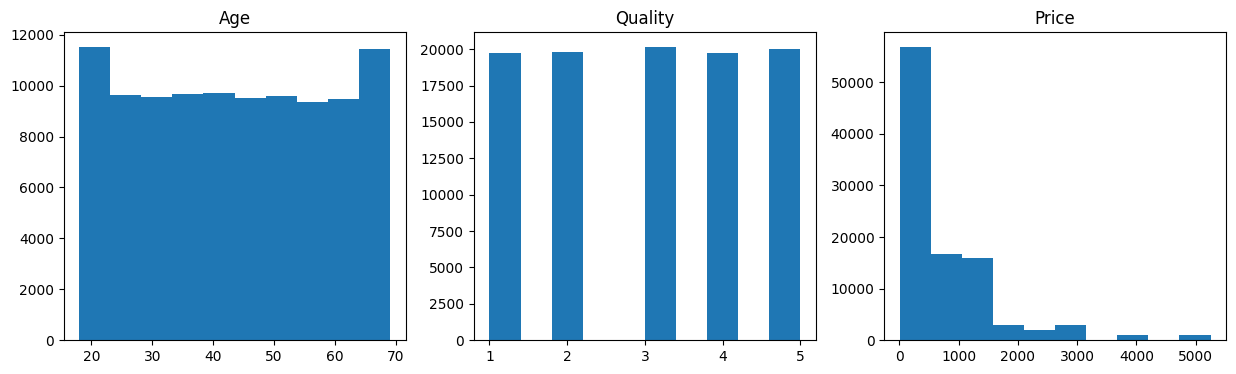

In [57]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].hist(dataset["age"])
axs[0].set_title('Age')

axs[1].hist(dataset['quantity'])
axs[1].set_title("Quality")

axs[2].hist(dataset['price'])
axs[2].set_title("Price")
plt.show()

In [59]:
dataset.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_20820\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,age,quantity,price
age,1.000000,0.000667,0.001694
quantity,0.000667,1.000000,0.344880
price,0.001694,0.344880,1.000000


<Axes: xlabel='quantity', ylabel='price'>

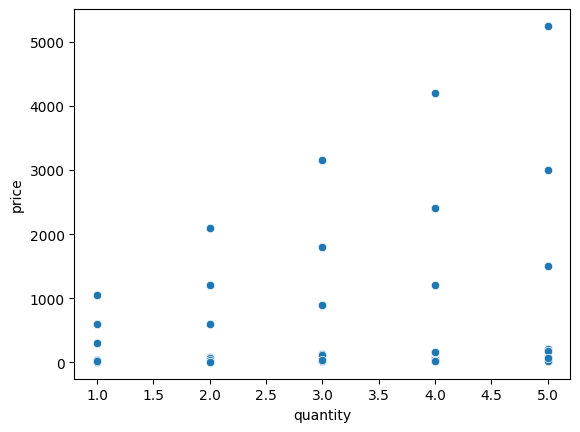

In [60]:
# Bivariate 

sns.scatterplot(data = dataset, x = "quantity", y = "price")

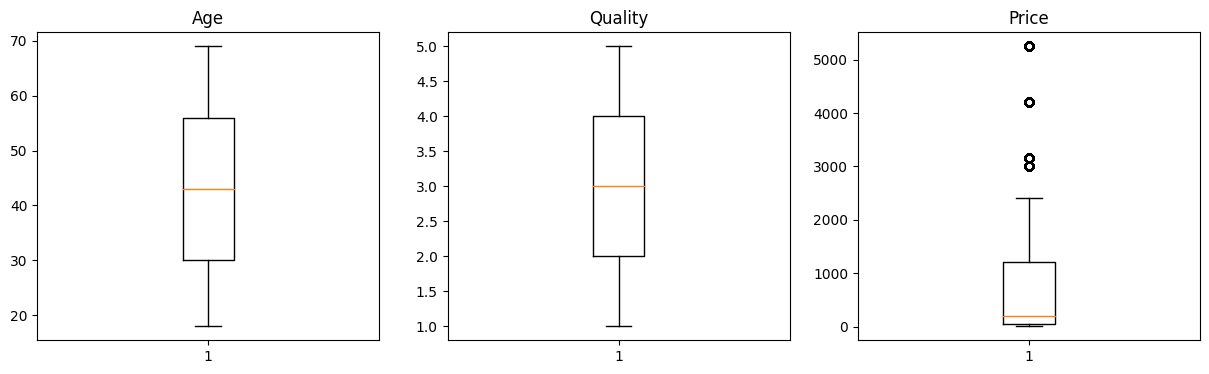

In [63]:
# outer analysis 

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].boxplot(dataset["age"])
axs[0].set_title('Age')

axs[1].boxplot(dataset['quantity'])
axs[1].set_title("Quality")

axs[2].boxplot(dataset['price'])
axs[2].set_title("Price")
plt.show()

In [65]:
# Add one column is sale

dataset['Sale'] = dataset.quantity * dataset.price

# Explotrary data analsysis 

# Descriptive analysis

In [67]:
# average sales 

dataset['Sale'].mean()

2528.78926822647

In [69]:
# What is the distribution of sales values across different categories?

dataset.groupby("category")['Sale'].describe().reset_index()

,category,count,mean,std,min,25%,50%,75%,max
0,Books,4981.0,167.547260,131.909394,15.15,60.60,136.35,242.40,378.75
1,Clothing,34487.0,3305.500364,2597.404620,300.08,1200.32,2700.72,4801.28,7502.00
2,Cosmetics,15097.0,449.947864,351.873613,40.66,162.64,365.94,650.56,1016.50
3,Food & Beverage,14776.0,57.494251,45.385558,5.23,20.92,47.07,83.68,130.75
4,Shoes,10034.0,6632.793649,5181.163758,600.17,2400.68,5401.53,9602.72,15004.25
5,Souvenir,4999.0,127.190368,101.236358,11.73,46.92,105.57,187.68,293.25
6,Technology,4996.0,11581.735388,9070.511913,1050.00,4200.00,9450.00,16800.00,26250.00
7,Toys,10087.0,394.609521,307.505112,35.84,143.36,322.56,573.44,896.00


In [73]:
# what is the total quantity sold for each product category?

dataset.groupby("category")['quantity'].sum()

category
Books               14982
Clothing           103558
Cosmetics           45465
Food & Beverage     44277
Shoes               30217
Souvenir            14871
Technology          15021
Toys                30321
Name: quantity, dtype: int64

In [74]:
#  How does the average age of customers vary across different categories? 

dataset.groupby("category")['age'].mean()

category
Books              43.541859
Clothing           43.409227
Cosmetics          43.580645
Food & Beverage    43.354426
Shoes              43.454953
Souvenir           43.393079
Technology         43.368495
Toys               43.326262
Name: age, dtype: float64

In [79]:
# What is the distribution of age across different gender groups? 

dataset.groupby("gender")['age'].describe().reset_index()

,gender,count,mean,std,min,25%,50%,75%,max
0,Female,59482.0,43.453515,14.965468,18.0,30.0,43.0,56.0,69.0
1,Male,39975.0,43.387767,15.026664,18.0,30.0,43.0,56.0,69.0


# Time analysis

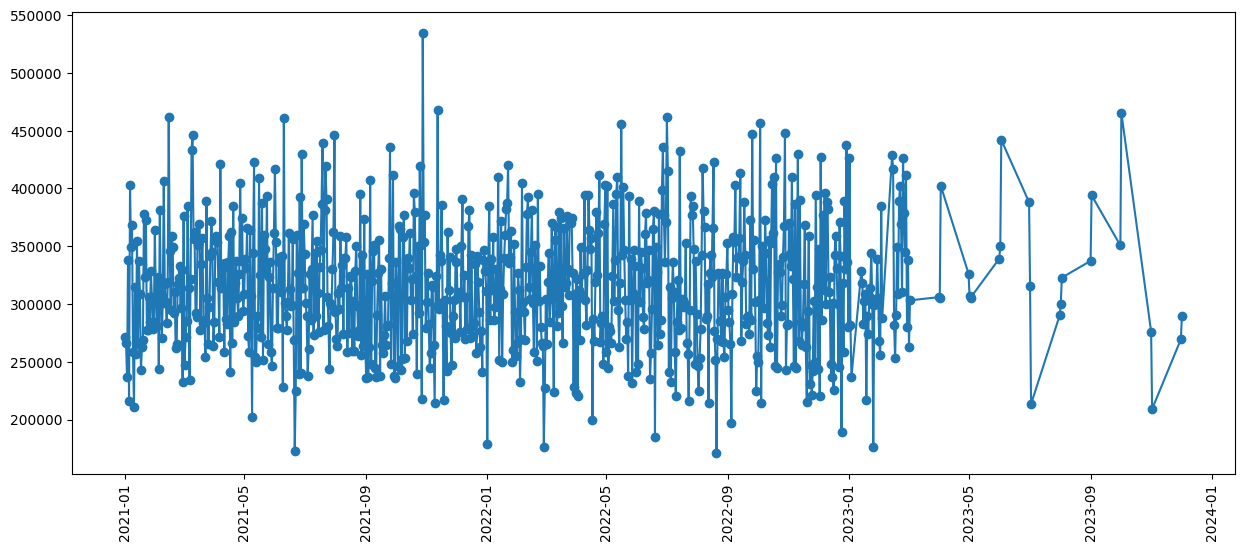

In [93]:
# How does the sales trend look over time (by month, week, or day)? 

# By Day
plt.figure(figsize=(15, 6))
saleByDate = dataset.groupby(dataset['invoice_date'].dt.date)['Sale'].sum().reset_index()
plt.plot(saleByDate['invoice_date'], saleByDate['Sale'], marker = 'o')
plt.xticks(rotation = 90)
plt.show()

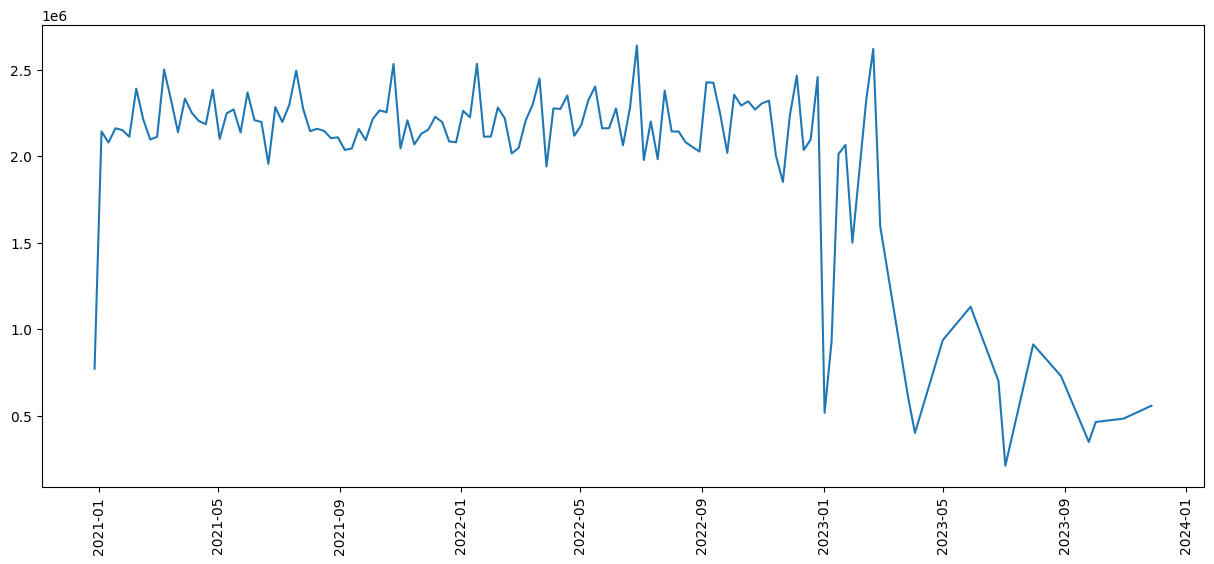

In [117]:
# by weak

plt.figure(figsize=(15, 6))
dataset['invoice_date'] = pd.to_datetime(dataset['invoice_date'])
saleByDate = dataset.groupby(dataset['invoice_date'].dt.to_period('w'))['Sale'].sum().reset_index()
saleByDate['invoice_date'] = saleByDate['invoice_date'].dt.start_time
plt.plot(saleByDate['invoice_date'], saleByDate['Sale'])
plt.xticks(rotation = 90)
plt.show()

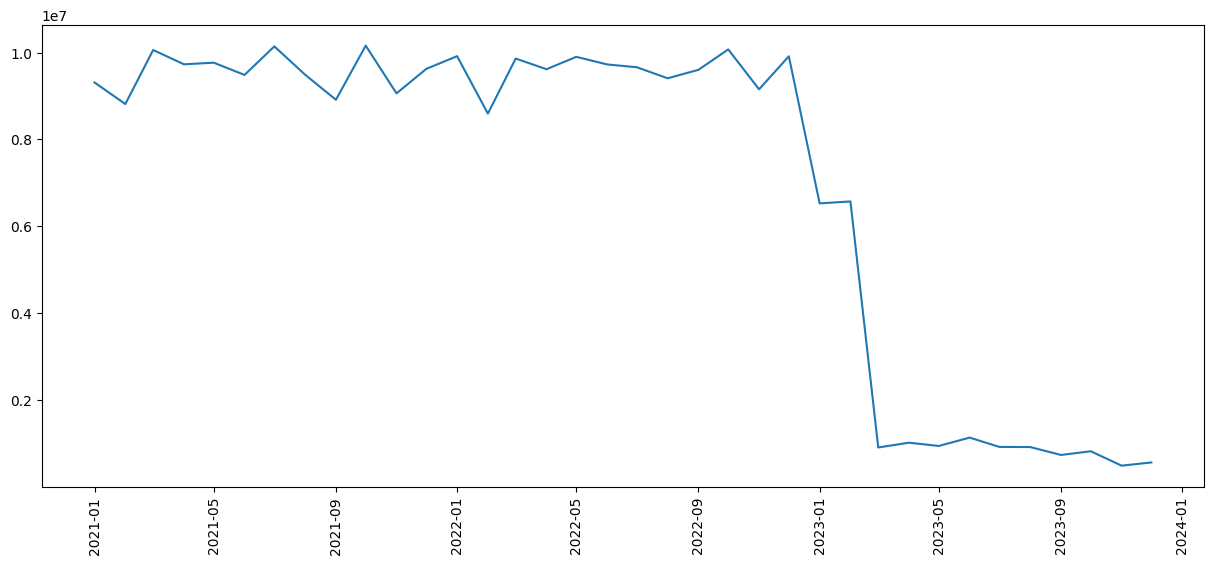

In [118]:
# by month

plt.figure(figsize=(15, 6))
dataset['invoice_date'] = pd.to_datetime(dataset['invoice_date'])
saleByDate = dataset.groupby(dataset['invoice_date'].dt.to_period('M'))['Sale'].sum().reset_index()
saleByDate['invoice_date'] = saleByDate['invoice_date'].dt.start_time
plt.plot(saleByDate['invoice_date'], saleByDate['Sale'])
plt.xticks(rotation = 90)
plt.show()

# Product Category & Sales Analysis 

In [128]:
# 1. Which product category generates the highest sales? 

dataset.groupby("category")['Sale'].sum().sort_values(ascending = False)

category
Clothing           1.139968e+08
Shoes              6.655345e+07
Technology         5.786235e+07
Cosmetics          6.792863e+06
Toys               3.980426e+06
Food & Beverage    8.495351e+05
Books              8.345529e+05
Souvenir           6.358247e+05
Name: Sale, dtype: float64

In [130]:
# 2. What is the average quantity purchased in each category?

dataset.groupby("category")['quantity'].mean()

category
Books              3.007830
Clothing           3.002813
Cosmetics          3.011525
Food & Beverage    2.996548
Shoes              3.011461
Souvenir           2.974795
Technology         3.006605
Toys               3.005948
Name: quantity, dtype: float64

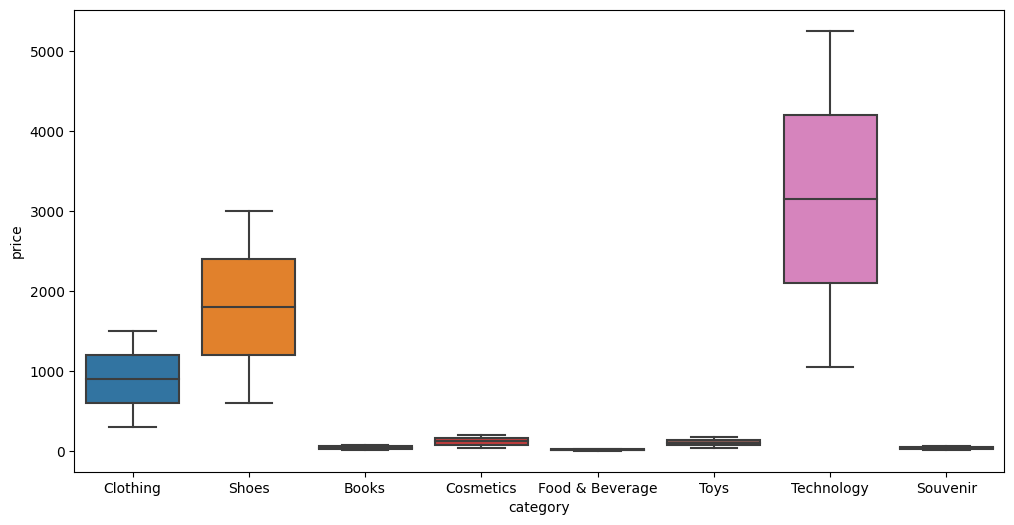

In [133]:
# 3. What is the price distribution for each product category? 

plt.figure(figsize=(12, 6))
sns.boxplot(data = dataset, x = "category", y = "price")
plt.show()

<Axes: xlabel='invoice_date'>

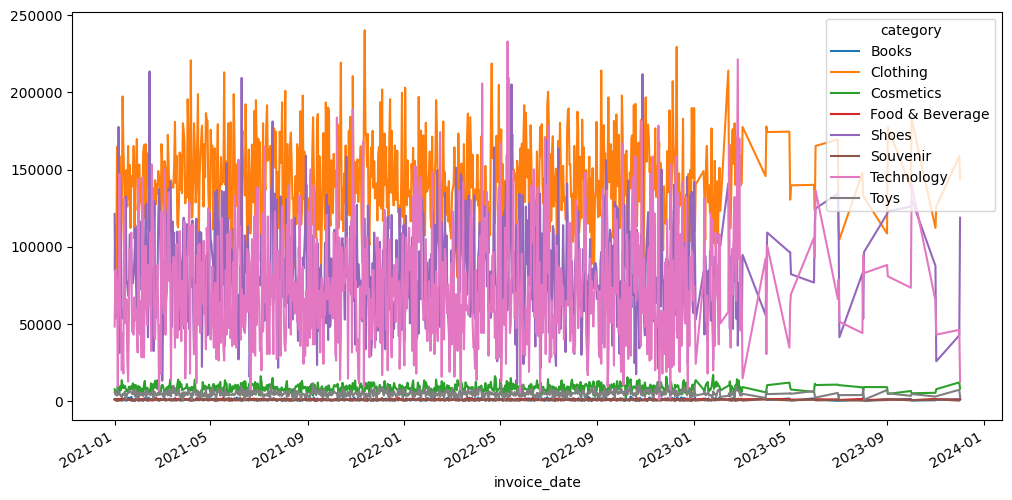

In [141]:
# 4. How does the sales value vary between different categories over time?

sale_by_category_ocer_time = dataset.groupby(["invoice_date", "category"])['Sale'].sum().unstack()
sale_by_category_ocer_time.plot(figsize = (12, 6))

# Mall-based Analysis 

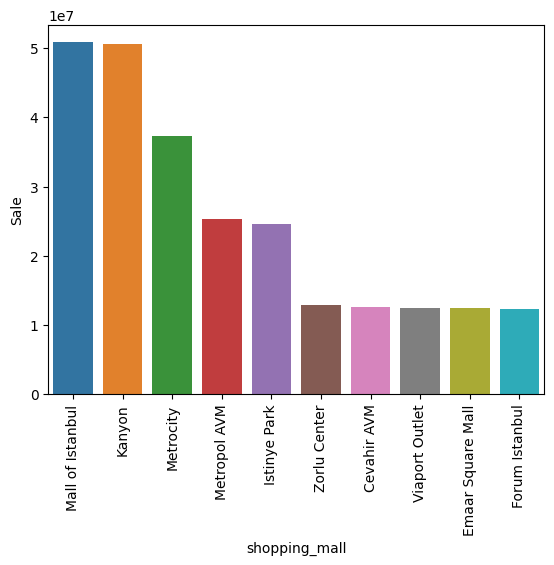

In [152]:
# Which shopping mall generates the highest sales? 

shoppingGenerateHighSales = dataset.groupby("shopping_mall")['Sale'].sum().sort_values(ascending = False).reset_index()
sns.barplot(data = shoppingGenerateHighSales, x = "shopping_mall", y ="Sale")
plt.xticks(rotation = 90)
plt.show()

In [154]:
# How do sales and quantity vary across different shopping malls? 

dataset.groupby("shopping_mall").agg({"Sale":"sum", "quantity":"sum"}).reset_index()

,shopping_mall,Sale,quantity
0,Cevahir AVM,12645138.20,14949
1,Emaar Square Mall,12406100.29,14501
2,Forum Istanbul,12303921.24,14852
3,Istinye Park,24618827.68,29465
4,Kanyon,50554231.10,59457
5,Mall of Istanbul,50872481.68,60114
6,Metrocity,37302787.33,44894
7,Metropol AVM,25379913.19,30530
8,Viaport Outlet,12521339.72,14716
9,Zorlu Center,12901053.82,15234


In [158]:
# 3. What is the distribution of customers per shopping mall?

dataset.groupby("shopping_mall")['customer_id'].nunique().sort_index(ascending = False)

shopping_mall
Zorlu Center          5075
Viaport Outlet        4914
Metropol AVM         10161
Metrocity            15011
Mall of Istanbul     19943
Kanyon               19823
Istinye Park          9781
Forum Istanbul        4947
Emaar Square Mall     4811
Cevahir AVM           4991
Name: customer_id, dtype: int64